# Predicting Car Prices

## Using K-Nearest Neighbors Algorithm(KNN) To Predict Car Prices

__In this project, a thorough machine learning workflow is used to predict a car's market price using its attributes. The data set used contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set <https://archive.ics.uci.edu/ml/datasets/automobile>__

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score

In [2]:
#load and preview the dataset

cars = pd.read_csv('imports-85.data')
pd.options.display.max_columns = 99
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250




As seen above, the column names are not the same as seen in the link above <https://archive.ics.uci.edu/ml/datasets/automobile> this is corrected manually below



### Data Cleaning

In [3]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 
'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 
'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',  'city-mpg', 'highway-mpg', 'price']

cars.columns = col_names
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


__From the first five rows above, we see some entries have '?' (normalized-losses column), for the machine learning algorithm to work, wewe need to deal effectively with this__

In [5]:
#Replace all '?' with nan values in the dataset

cars.replace('?',np.nan,inplace=True)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
#View the summary of the dataset for some insights
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
symboling            204 non-null int64
normalized-losses    164 non-null object
make                 204 non-null object
fuel-type            204 non-null object
aspiration           204 non-null object
num-of-doors         202 non-null object
body-style           204 non-null object
drive-wheels         204 non-null object
engine-location      204 non-null object
wheel-base           204 non-null float64
length               204 non-null float64
width                204 non-null float64
height               204 non-null float64
curb-weight          204 non-null int64
engine-type          204 non-null object
num-of-cylinders     204 non-null object
engine-size          204 non-null int64
fuel-system          204 non-null object
bore                 200 non-null object
stroke               200 non-null object
compression-ratio    204 non-null float64
horsepower           202 non-nul

__Since we see some columns have nan values, we will attempt to have a more detailed count of which columns have Nan values and how many Nan values each column has__

In [7]:
cars.isna().sum()

symboling             0
normalized-losses    40
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
#Since it the price we are trying to predict, we will drop rows with na values from the price column
cars.dropna(subset=['price'], inplace=True)
cars['price'].isna().sum()

0

__In order to fill the remaining columns with their mean, we need to convert some columns that are numeric but stored as object type. These columns need to be converted to float__

In [9]:
#Convert specific columns to float type
cars[['bore','stroke','horsepower','peak-rpm','normalized-losses','price']] = cars[['bore','stroke',
                                                        'horsepower','peak-rpm','normalized-losses','price']].astype('float64')
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 203
Data columns (total 26 columns):
symboling            200 non-null int64
normalized-losses    164 non-null float64
make                 200 non-null object
fuel-type            200 non-null object
aspiration           200 non-null object
num-of-doors         198 non-null object
body-style           200 non-null object
drive-wheels         200 non-null object
engine-location      200 non-null object
wheel-base           200 non-null float64
length               200 non-null float64
width                200 non-null float64
height               200 non-null float64
curb-weight          200 non-null int64
engine-type          200 non-null object
num-of-cylinders     200 non-null object
engine-size          200 non-null int64
fuel-system          200 non-null object
bore                 196 non-null float64
stroke               196 non-null float64
compression-ratio    200 non-null float64
horsepower           198 non-

In [10]:
#Fill each column that have Nan values with the mean of the column
cars.fillna(np.mean(cars), inplace=True)
cars.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
#Create a dataset of numeric values only for the prediction
numeric_cars = cars.copy()
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 
                          'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = numeric_cars[continuous_values_cols]
numeric_cars.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
#Preview the numeric dataset after cleaning
numeric_cars.head(7)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
1,122.0,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
2,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
3,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
4,122.0,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
5,158.0,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
6,122.0,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0


## Normalization of Data

All columns apart from the price colum which we want to predict, should be normalized so that each feature contributes approximately proportionately to the final result.

In [13]:
#to normalize, we use standardization: x-(mean)/std()
#Create a normalized dataframe

normalized_cars = (numeric_cars - numeric_cars.mean()) / numeric_cars.std()
normalized_cars['price'] = numeric_cars['price']
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-1.697177,-0.439616,-0.855008,-2.055427,-0.014857,0.521295,-1.845608,-0.291493,0.204013,-0.246603,-0.652936,-0.542680,16500.0
1,0.000000,-0.720075,-0.245239,-0.189262,-0.572999,0.515422,-2.420296,0.668901,-0.291493,1.352043,-0.246603,-0.963857,-0.689152,16500.0
2,1.309368,0.157661,0.192109,0.143611,0.209393,-0.421726,-0.521295,0.446096,-0.042375,-0.036272,0.796716,-0.186553,-0.103263,13950.0
3,1.309368,0.091417,0.192109,0.238717,0.209393,0.517350,-0.521295,0.446096,-0.540611,0.310807,0.796716,-1.119318,-1.275042,17450.0
4,0.000000,0.157661,0.248803,0.191164,-0.284750,-0.093917,-0.521295,0.446096,-0.416052,0.177315,0.796716,-0.963857,-0.835625,15250.0


##  K-Nearest Neighbors Models

In [14]:
#univariate k-nearest neighbors model

def knn_train_test(train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    #split the dataset into two equal parts, i.e Holdout Validation
    v = int((df.shape[0])/2)
    
    train_df = df[:v]
    test_df = df[v:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_col]], train_df[target_col])
    price = knn.predict(test_df[[train_col]])
    
    #Calculate and return the root mean square value
    rmse = np.sqrt(mean_squared_error(test_df[target_col],price))
    return rmse

In [15]:
#Predict the price using each column as a feature and see which one performs best
feature = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']

rmse_vals = {}
for i in feature:
    tr_col = i
    tar_col = 'price'
    result = knn_train_test(tr_col, tar_col, normalized_cars)
    rmse_vals[i] = result
    
rmse_vals
rmse_vals_series = pd.Series(rmse_vals)
rmse_vals_series.sort_values()

highway-mpg           3898.796765
horsepower            4207.574222
city-mpg              5066.448504
curb-weight           5102.952989
width                 6870.085017
length                7953.614345
compression-ratio     8081.577268
normalized-losses     8512.640460
stroke                8995.742047
peak-rpm              9639.342227
wheel-base           10048.153976
height               10726.877197
bore                 13455.609533
dtype: float64

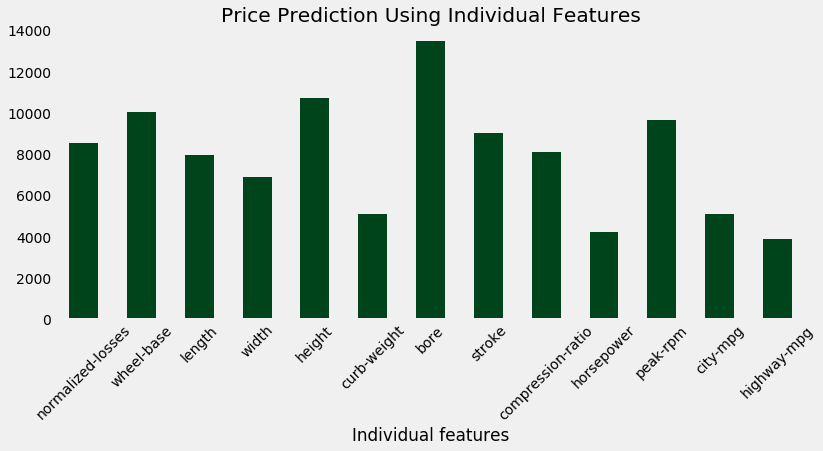

In [16]:
#Visualize the result
%matplotlib inline
style.use('fivethirtyeight')
rmse_vals_series.plot(kind='bar',
                      label='Price',
                      figsize=(12,5),
                      rot=45,
                      colormap=plt.cm.BuGn_r)
plt.title('Price Prediction Using Individual Features')
plt.grid()
plt.xlabel('Individual features')
plt.show()

### Based on the visualization above, the highway miles per gallon gave the least root mean square error in predicting price for the default k value.

In [17]:
#Predicting price by varying the k value

def knn_train_test(k_value, train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    #split the dataset into two equal parts, i.e Holdout Validation
    v = int((df.shape[0])/2)
    
    train_df = df[:v]
    test_df = df[v:]
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(train_df[[train_col]], train_df[target_col])
    price = knn.predict(test_df[[train_col]])
    
    #Calculate and return the root mean square value
    rmse = np.sqrt(mean_squared_error(test_df[target_col],price))
    return rmse

In [18]:
#Predict price per feature for each k value
feature = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']

k = [1,3,5,7,9]

rmse_values = []
per_feature = []

for n in k:
    for i in feature:
        p = n
        tr_col = i
        tar_col = 'price'
        result = knn_train_test(p, tr_col, tar_col, normalized_cars)
        rmse_vals[i] = result
        per_feature.append(result)

per_feature[:13]

[12126.993629915041,
 7868.348779127677,
 9974.825367393656,
 8066.505591642517,
 13651.426566846412,
 6619.854376797121,
 16592.22097460132,
 11127.36925827484,
 8348.105763584934,
 7077.141183415801,
 10362.20034500395,
 5711.47586355751,
 5256.865560388624]

In [19]:
#Create a dataframe of rmse values and feature

#Create a dictionary of values with each key assigned the correct values
rmse_vals = {'k_value_1':per_feature[:13],'k_value_3':per_feature[13:26],
             'k_value_5':per_feature[26:39],'k_value_7':per_feature[39:52],
            'k_value_9':per_feature[52:65]}

#Create a datframe using the dictionary
rmse_vals_df = pd.DataFrame(rmse_vals)

#Create a column that will used as the index
rmse_vals_df['features'] = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg']

#Set the index
rmse_vals_df.set_index('features',inplace=True)

rmse_vals_df.sort_values('k_value_5')

,k_value_1,k_value_3,k_value_5,k_value_7,k_value_9
features,,,,,
highway-mpg,5256.865560,4690.725092,3898.796765,3972.658509,3830.708232
horsepower,7077.141183,5475.645904,4207.574222,3640.786409,3522.578290
city-mpg,5711.475864,5074.190079,5066.448504,4922.952961,4953.399673
curb-weight,6619.854377,5460.288140,5102.952989,5066.200208,5090.889045
width,8066.505592,7250.367155,6870.085017,6590.516826,6576.456554
length,9974.825367,7942.876947,7953.614345,8146.358407,7570.257313
compression-ratio,8348.105764,9101.308755,8081.577268,7983.659283,7861.761475
normalized-losses,12126.993630,9748.738119,8512.640460,7755.654141,7748.759922
stroke,11127.369258,12000.455140,8995.742047,7958.631045,7990.654972


Text(0.5,1,'Varying K-Value Used in Predicting Car Prices')

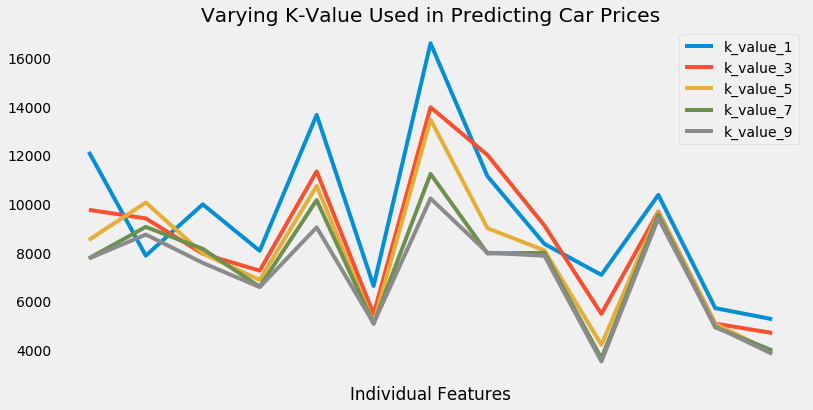

In [20]:
#Visualize the result
rmse_vals_df.plot(figsize=(12,6))
plt.grid()
plt.xlabel('Individual Features')
plt.title('Varying K-Value Used in Predicting Car Prices')

__From the visualization above, we see that among the k values used, 9 seems to be the one that gives the least root mean square error__

## Selecting the Best Features for Predicting

In [21]:
rmse_vals_df.sort_values('k_value_5')

,k_value_1,k_value_3,k_value_5,k_value_7,k_value_9
features,,,,,
highway-mpg,5256.865560,4690.725092,3898.796765,3972.658509,3830.708232
horsepower,7077.141183,5475.645904,4207.574222,3640.786409,3522.578290
city-mpg,5711.475864,5074.190079,5066.448504,4922.952961,4953.399673
curb-weight,6619.854377,5460.288140,5102.952989,5066.200208,5090.889045
width,8066.505592,7250.367155,6870.085017,6590.516826,6576.456554
length,9974.825367,7942.876947,7953.614345,8146.358407,7570.257313
compression-ratio,8348.105764,9101.308755,8081.577268,7983.659283,7861.761475
normalized-losses,12126.993630,9748.738119,8512.640460,7755.654141,7748.759922
stroke,11127.369258,12000.455140,8995.742047,7958.631045,7990.654972


__From the result above, using the default k value, we see the top 5 features that give the least root mean square error. We will look at these features in batches to see the best__

### Best Two Features

In [22]:
#Bi-variate k-nearest neigbors model

#Predicting price by varying the k value

def knn_train_test(k_value, train_col, target_col, df):
    
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    #split the dataset into two equal parts, i.e Holdout Validation
    v = int((df.shape[0])/2)
    
    train_df = df[:v]
    test_df = df[v:]
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(train_df[train_col], train_df[target_col])
    price = knn.predict(test_df[train_col])
    
    #Calculate and return the root mean square value
    rmse = np.sqrt(mean_squared_error(test_df[target_col],price))
    return rmse

In [23]:
#Using the two best features, horse power and highway-mpg
features = ['highway-mpg','horsepower']
k = [1,3,5,7,9]

rmse_two = {}

for i in k:
    p = i
    tr_col = features
    tar_col = 'price'
    result = knn_train_test(p, tr_col, tar_col, normalized_cars)
    rmse_two[i] = result

rmse_two

{1: 3375.918512049721,
 3: 3602.815892696526,
 5: 3241.6513014820084,
 7: 3281.845719054061,
 9: 3011.7887161315425}

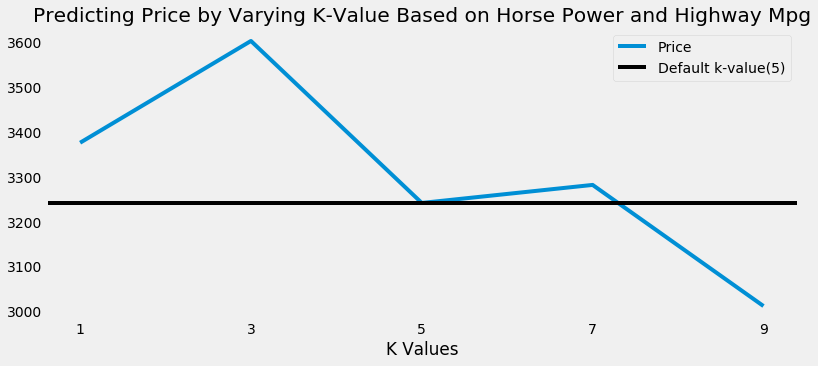

In [24]:
#Visualize the result
rmse_ser = pd.Series(rmse_two)
rmse_ser.plot(label='Price',figsize=(12,5))
plt.xlabel('K Values')
plt.xticks(np.arange(1, 10, step=2))
plt.title('Predicting Price by Varying K-Value Based on Horse Power and Highway Mpg')
plt.axhline(rmse_ser[5], color='Black', label = 'Default k-value(5)')
plt.legend()
plt.grid()
plt.show()

### Best Three Features

In [25]:
#Using the same function but selecting the best three features

#Using the three best features, horse power and city mpg
features = ['highway-mpg','horsepower','city-mpg']
k = [1,3,5,7,9]

rmse_three = {}
per_feature = []

for i in k:
    p = i
    tr_col = features
    tar_col = 'price'
    result = knn_train_test(p, tr_col, tar_col, normalized_cars)
    rmse_three[i] = result

rmse_three

{1: 3863.853027743162,
 3: 4274.590009449899,
 5: 3883.811977374806,
 7: 3681.5956175860174,
 9: 3472.9222947764833}

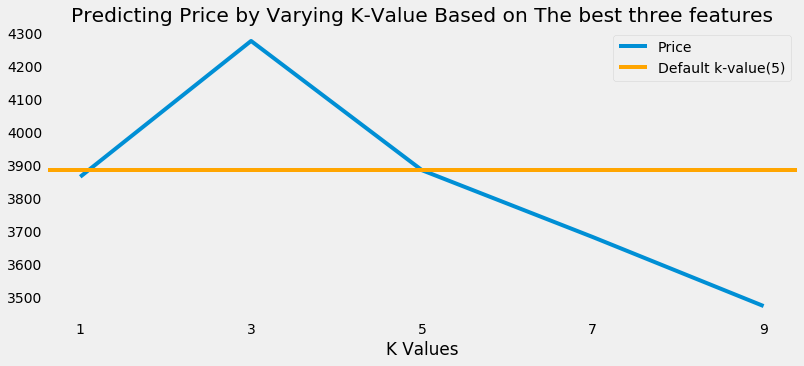

In [26]:
#Visualize the result

rmse_ser = pd.Series(rmse_three)
rmse_ser.plot(label='Price',figsize=(12,5))
plt.xlabel('K Values')
plt.xticks(np.arange(1, 10, step=2))
plt.title('Predicting Price by Varying K-Value Based on The best three features')
plt.axhline(rmse_ser[5], color='orange', label = 'Default k-value(5)')
plt.legend()
plt.grid()
plt.show()

### Best Four Features

In [27]:
#Using the four best features, horse power, city mpg and Curb weight
features = ['highway-mpg','horsepower','city-mpg','curb-weight']
k = [1,3,5,7,9]

rmse_four = {}
per_feature = []

for i in k:
    p = i
    tr_col = features
    tar_col = 'price'
    result = knn_train_test(p, tr_col, tar_col, normalized_cars)
    rmse_four[i] = result

rmse_four

{1: 5165.539439400303,
 3: 3959.078702593992,
 5: 4050.2620951735944,
 7: 4030.019828127653,
 9: 4179.048228298454}

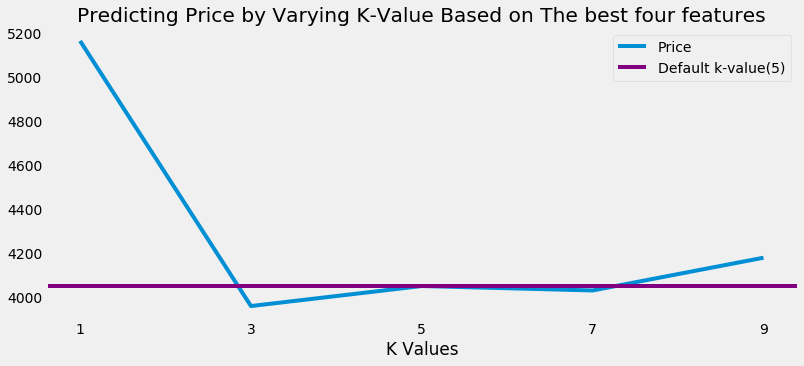

In [28]:
#Visualize the result

rmse_ser = pd.Series(rmse_four)
rmse_ser.plot(label='Price',figsize=(12,5))
plt.xlabel('K Values')
plt.xticks(np.arange(1, 10, step=2))
plt.title('Predicting Price by Varying K-Value Based on The best four features')
plt.axhline(rmse_ser[5], color='Purple', label = 'Default k-value(5)')
plt.legend()
plt.grid()
plt.show()

### Best Five Features

In [29]:
#Using the best five features: horse power, city mpg and Curb weight
features = ['highway-mpg','horsepower','city-mpg','curb-weight','width']
k = [1,3,5,7,9]

rmse_five = {}
per_feature = []

for i in k:
    p = i
    tr_col = features
    tar_col = 'price'
    result = knn_train_test(p, tr_col, tar_col, normalized_cars)
    rmse_five[i] = result

rmse_five

{1: 5421.547376902649,
 3: 4564.7401222121425,
 5: 4554.327123736282,
 7: 4366.171769200482,
 9: 4162.656765846412}

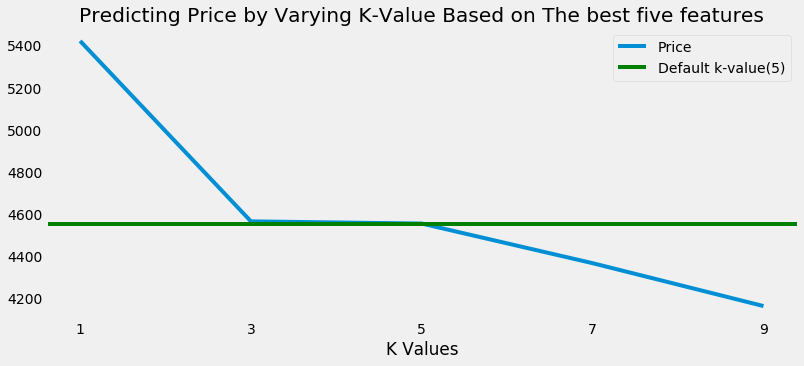

In [30]:
#Visualize the result

rmse_ser = pd.Series(rmse_five)
rmse_ser.plot(label='Price',figsize=(12,5))
plt.xlabel('K Values')
plt.xticks(np.arange(1, 10, step=2))
plt.title('Predicting Price by Varying K-Value Based on The best five features')
plt.axhline(rmse_ser[5], color='Green', label = 'Default k-value(5)')
plt.legend()
plt.grid()
plt.show()

In [31]:
#Create a dataframe summarizing the result
by_rank = [rmse_two, rmse_three, rmse_four, rmse_five]
by_rank_df = pd.DataFrame(by_rank)

#transpose the data
by_rank_df = by_rank_df.transpose()

#Change the column names
col_names = ['best_two', 'best_three','best_four','best_five']
by_rank_df.columns = col_names

by_rank_df

,best_two,best_three,best_four,best_five
1,3375.918512,3863.853028,5165.539439,5421.547377
3,3602.815893,4274.590009,3959.078703,4564.740122
5,3241.651301,3883.811977,4050.262095,4554.327124
7,3281.845719,3681.595618,4030.019828,4366.171769
9,3011.788716,3472.922295,4179.048228,4162.656766


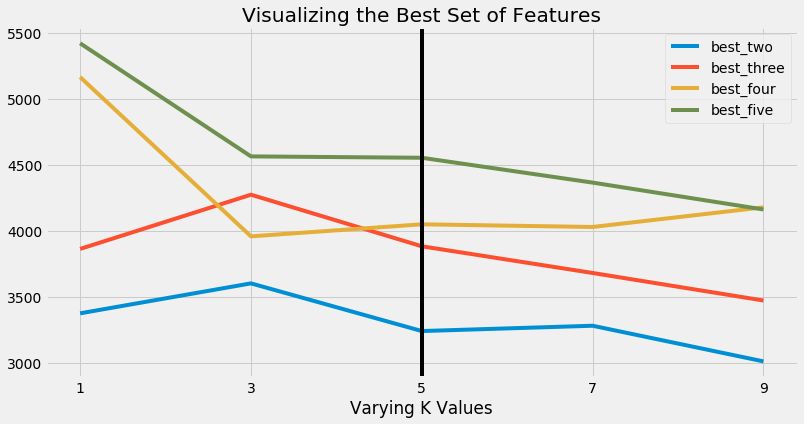

In [32]:
#Visualize the result

by_rank_df.plot(figsize=(12,6))
plt.xticks(np.arange(1,10,2))
plt.xlabel('Varying K Values')
#plt.grid()
plt.title('Visualizing the Best Set of Features')
plt.axvline(5, color = 'Black', label = 'Default k value')
plt.show()

## Selecting The Best K Value

__From the visualization above, the best two features produced the least root mean square error for all k values above, we will analyse which is the best k value to use__

In [33]:
features = ['highway-mpg','horsepower']

rmse_two = {}

for i in range(1,25):
    p = i
    tr_col = features
    tar_col = 'price'
    result = knn_train_test(p, tr_col, tar_col, normalized_cars)
    rmse_two[i] = result

rmse_two

{1: 3375.918512049721,
 2: 3536.383986503728,
 3: 3602.815892696526,
 4: 3256.162970909933,
 5: 3241.6513014820084,
 6: 3215.8223692911483,
 7: 3281.845719054061,
 8: 3224.996837837597,
 9: 3011.7887161315425,
 10: 2917.553278142492,
 11: 2949.9826748895935,
 12: 3066.816292771889,
 13: 3272.148417347222,
 14: 3486.1343756519254,
 15: 3545.6367651899523,
 16: 3647.838615670458,
 17: 3687.267673844864,
 18: 3635.3407487010986,
 19: 3716.0217317378438,
 20: 3783.5044801446975,
 21: 3897.6536998692313,
 22: 3992.083081674495,
 23: 4063.8430932644246,
 24: 4089.9847755676305}

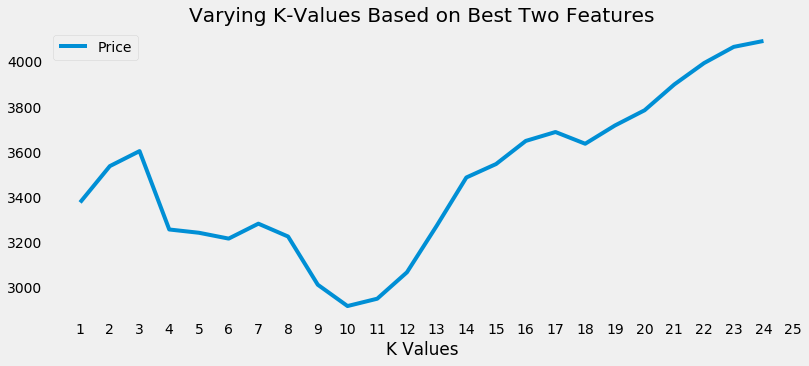

In [34]:
#Visualize the result

#rmse_ser = pd.Series(rmse_five)
pd.Series(rmse_two).plot(label='Price',figsize=(12,5))
plt.xlabel('K Values')
plt.xticks(np.arange(1, 26, step=1))
plt.title('Varying K-Values Based on Best Two Features')
#plt.axhline(rmse_ser[5], color='Green', label = 'Default k-value(5)')
plt.legend()
plt.grid()
plt.show()

__From the visualization above, it seems the k value of 10 gives the best result__

## K-Fold and Cross Validation Score

__The process will now be automated using sklearn inbuilt function__

In [35]:
for fold in range(2,25):
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    
    #Select the best two features
    mses = cross_val_score(model, normalized_cars[["horsepower","highway-mpg"]], normalized_cars["price"],
                           scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    
    #Print the average rmse and standard rmse
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), ",", "std RMSE: ", str(std_rmse))

2 folds:  avg RMSE:  3575.816164241379 , std RMSE:  7.840073346149666
3 folds:  avg RMSE:  3330.6846874266157 , std RMSE:  185.97838967663944
4 folds:  avg RMSE:  3250.2568023629346 , std RMSE:  507.02130990074784
5 folds:  avg RMSE:  3209.6324416717534 , std RMSE:  670.9051467742804
6 folds:  avg RMSE:  3200.3975814526925 , std RMSE:  457.2276504147265
7 folds:  avg RMSE:  3198.2308443392976 , std RMSE:  579.0706876288963
8 folds:  avg RMSE:  3131.9361398043884 , std RMSE:  689.7808827353721
9 folds:  avg RMSE:  3101.4533278838885 , std RMSE:  540.3410281168195
10 folds:  avg RMSE:  3156.6506804254254 , std RMSE:  840.1621859913118
11 folds:  avg RMSE:  3099.0961578105635 , std RMSE:  765.2696542518632
12 folds:  avg RMSE:  3106.383759488707 , std RMSE:  780.4848753091089
13 folds:  avg RMSE:  3143.5245320284002 , std RMSE:  742.8512988321759
14 folds:  avg RMSE:  3122.9165756862453 , std RMSE:  907.1824714623766
15 folds:  avg RMSE:  2969.417744684222 , std RMSE:  1040.3686675390409


So far, we've been working under the assumption that a lower RMSE always means that a model is more accurate. This isn't the complete picture, unfortunately. A model has two sources of error, bias and variance.

Bias describes error that results in bad assumptions about the learning algorithm. For example, assuming that only one feature, like a car's weight, relates to a car's fuel efficiency will lead you to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's fuel efficiency is affected by many other factors besides just its weight.

Variance describes error that occurs because of the variability of a model's predicted values. If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have low bias but high variance. In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff.

The standard deviation of the RMSE values can be a proxy for a model's variance while the average RMSE is a proxy for a model's bias. Bias and variance are the 2 observable sources of error in a model that we can indirectly control.

# Thank you for Reading